___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Matplotlib Overview Lecture

## Introduction

Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

It is an excellent 2D and 3D graphics library for generating scientific figures. 

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Matplotlib allows you to create reproducible figures programmatically. Let's learn how to use it! Before continuing this lecture, I encourage you just to explore the official Matplotlib web page: http://matplotlib.org/

## Installation 

You'll need to install matplotlib first with either:

    conda install matplotlib
or
    pip install matplotlib
    
## Importing

Import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [1]:
import matplotlib.pyplot as plt

You'll also need to use this line to see plots in the notebook:

In [2]:
%matplotlib inline

That line is only for jupyter notebooks, if you are using another editor, you'll use: **plt.show()** at the end of all your plotting commands to have the figure pop up in another window.

# Basic Example

Let's walk through a very simple example using two numpy arrays:

### Example

Let's walk through a very simple example using two numpy arrays. You can also use lists, but most likely you'll be passing numpy arrays or pandas columns (which essentially also behave like arrays).

** The data we want to plot:**

In [3]:
import numpy as np
x = np.linspace(0, 5, 11 )
y = x ** 2

In [4]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [5]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## Basic Matplotlib Commands

We can create a very simple line plot using the following ( I encourage you to pause and use Shift+Tab along the way to check out the document strings for the functions we are using).
## Plot types
https://matplotlib.org/stable/plot_types/index.html

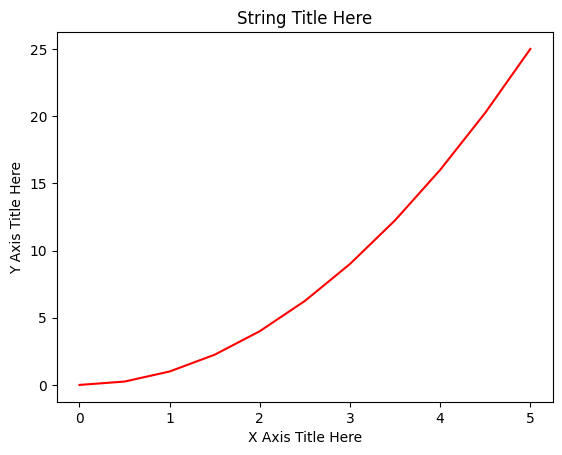

In [6]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

## Creating Multiplots on Same Canvas

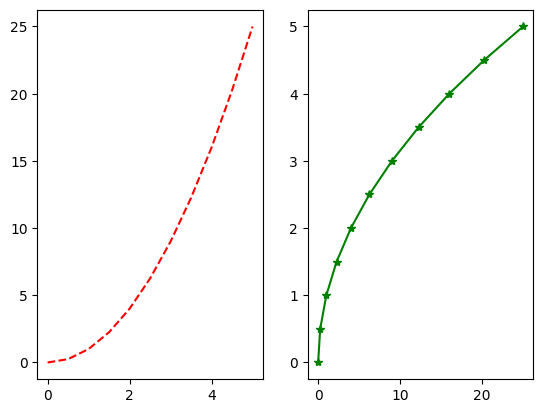

In [7]:
# plt.subplot(nrows, ncols, plot_number)
#plt.subplots(nrows=4, ncols=4)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

___
# Matplotlib Object Oriented Method
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

## Introduction to the Object Oriented Method

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it. 

To begin we create a figure instance. Then we can add axes to that figure:

Text(0.5, 1.0, 'Set Title')

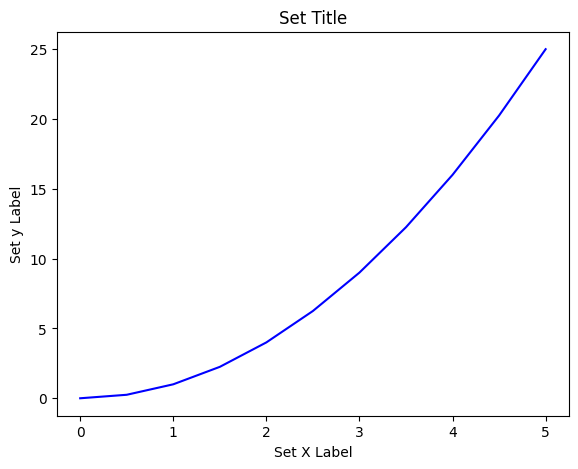

In [8]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

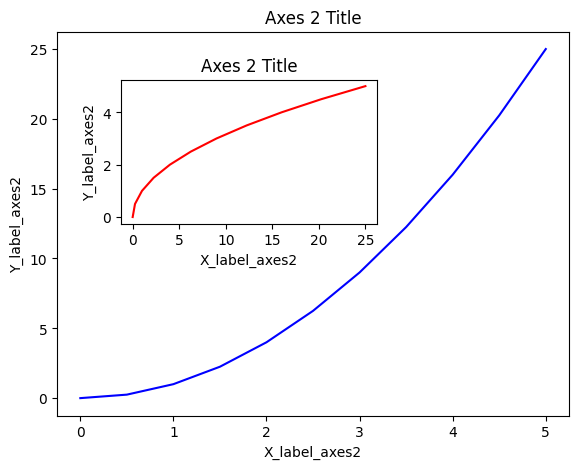

In [9]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes # left, bottom, width, height (range 0 to 1)
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes # left, bottom, width, height (range 0 to 1)

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

## subplots()

The plt.subplots() object will act as a more automatic axis manager.

Basic use cases:

Axes(0.125,0.11;0.775x0.77)


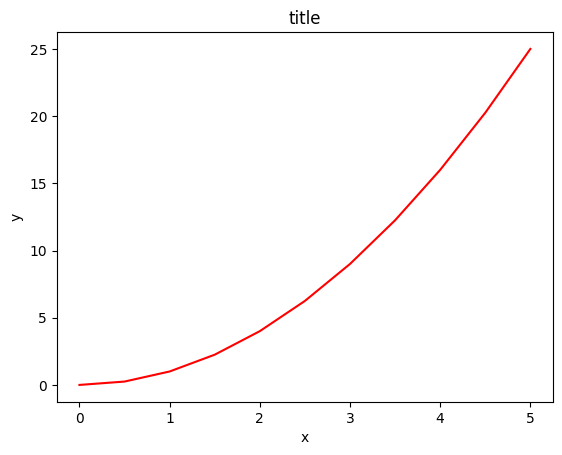

In [10]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()
print(axes)
# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Then you can specify the number of rows and columns when creating the subplots() object:

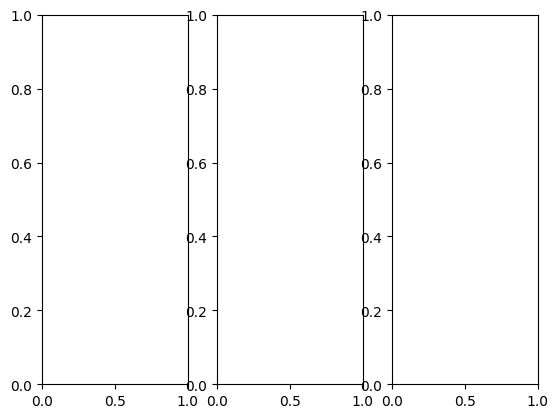

In [11]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=3)

In [12]:
# Axes is an array of axes to plot on
axes

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

We can iterate through this array:

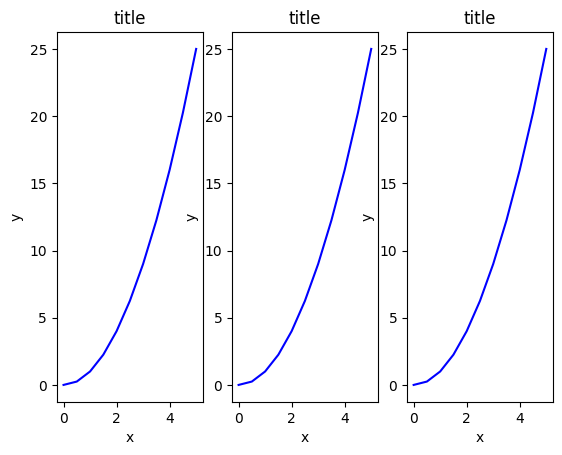

In [13]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

A common issue with matplolib is overlapping subplots or figures. We ca use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

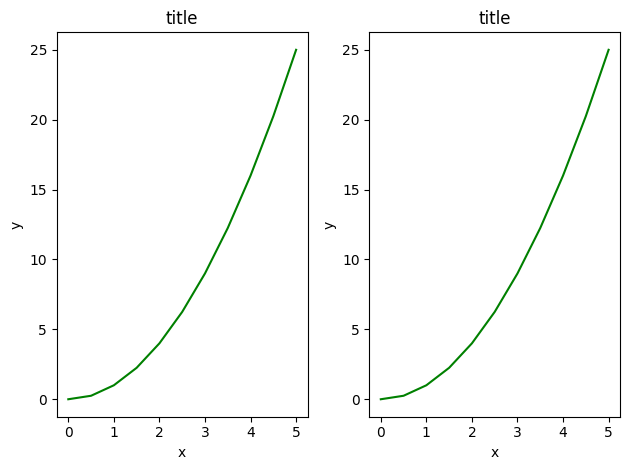

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
plt.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

In [15]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

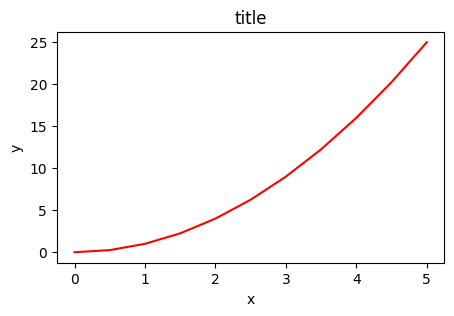

In [16]:
fig, axes = plt.subplots(figsize=(5,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [17]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [18]:
fig.savefig("filename.png", dpi=200)

____
## Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [19]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [20]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Legends

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure: 

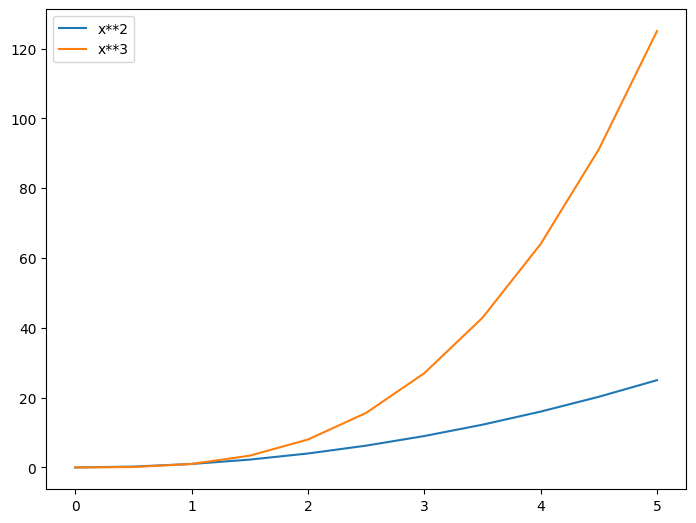

In [21]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

#Lets Implement wsome different types of chart 

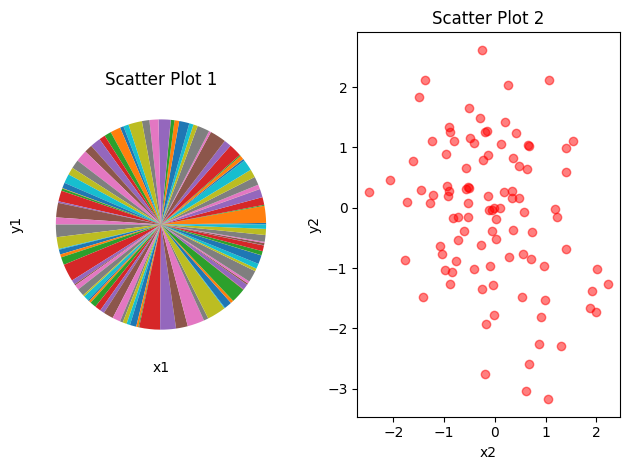

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Create some random data
x = np.random.randn(100)
y = np.random.randn(100)

fig, axes = plt.subplots(nrows=1, ncols=2)

for i, ax in enumerate(axes):
    
    if i == 1 :
        # Create a scatter plot
        ax.scatter(x, y, color='red', alpha=0.5)
    else:
        ax.pie(abs(x))

    # Set the axis labels and title
    ax.set_xlabel(f'x{i+1}')
    ax.set_ylabel(f'y{i+1}')
    ax.set_title(f'Scatter Plot {i+1}')

plt.tight_layout()
# Show the plot
plt.show()


here's a list of some of the most commonly used plotting functions in matplotlib:

plot(): used to create line plots.
scatter(): used to create scatter plots.
bar(): used to create vertical bar plots.
barh(): used to create horizontal bar plots.
hist(): used to create histograms of one-dimensional data.
pie(): used to create pie charts.
boxplot(): used to create box-and-whisker plots.
violinplot(): used to create violin plots.
heatmap(): used to create heatmaps.
imshow(): used to display images.
contour() and contourf(): used to create contour plots.
quiver(): used to create vector field plots.
streamplot(): used to create streamline plots.
errorbar(): used to create error bar plots.
fill(): used to create filled area plots.
stackplot(): used to create stacked area plots.
hexbin(): used to create hexagonal bin plots.

matplotlib integrates well with pandas, which is a popular data analysis library in Python. pandas provides a plot() method that allows you to create different types of plots from DataFrame and Series objects using matplotlib under the hoo

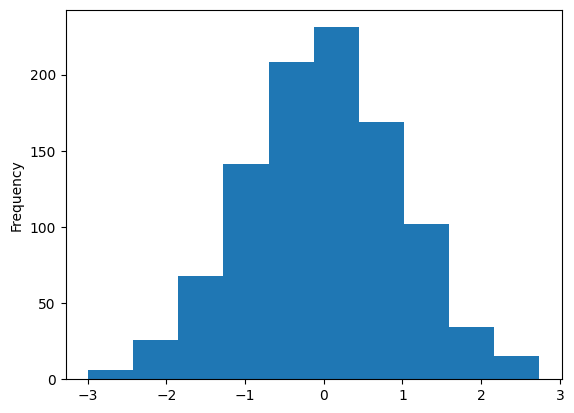

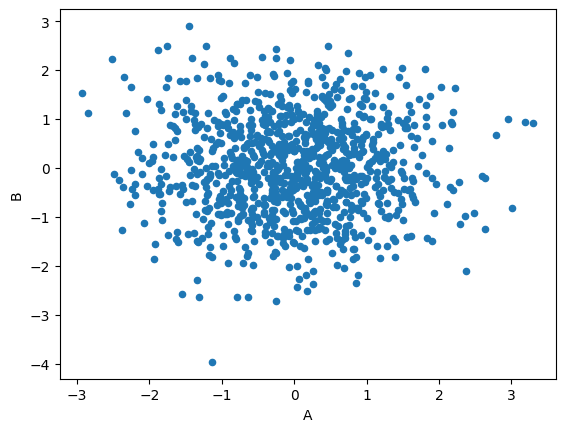

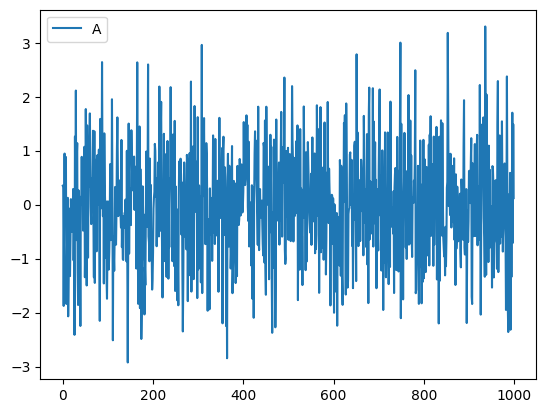

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a pandas Series
s = pd.Series(np.random.randn(1000))

# Create a histogram of the series
s.plot.hist()

# Create a pandas DataFrame
df = pd.DataFrame({'A': np.random.randn(1000),
                   'B': np.random.randn(1000)})

# Create a scatter plot of two columns in the DataFrame
df.plot.scatter(x='A', y='B')

# Create a line plot of a column in the DataFrame
df.plot.line(y='A')

# Show the plots
plt.show()


more details on pandas integration with matplotlib.

Plot types: The plot() method in pandas supports a wide range of plot types, including line, bar, scatter, area, histogram, pie, and box plots. You can specify the plot type using the kind parameter.

Data grouping: pandas also provides an easy way to group your data by one or more columns and create a plot for each group. This can be useful when you want to compare different subsets of your data. You can use the groupby() method to group your data, and then call the plot() method on the resulting GroupBy object.

Customization: You can customize the appearance of your plots using various parameters, such as title, xlabel, ylabel, xlim, ylim, legend, grid, color, and so on. You can also use matplotlib functions to further customize your plots.

Subplots: You can create multiple subplots within a single figure using the subplots() method in pandas. This allows you to display multiple plots side by side for comparison

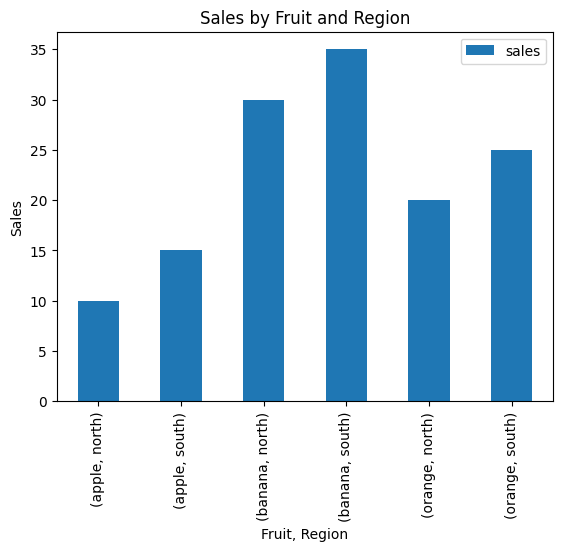

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
data = {'fruit': ['apple', 'orange', 'banana', 'apple', 'orange', 'banana'],
        'sales': [10, 20, 30, 15, 25, 35],
        'region': ['north', 'north', 'north', 'south', 'south', 'south']}
df = pd.DataFrame(data)

# Group the data by fruit and region, and calculate the total sales for each group
grouped = df.groupby(['fruit', 'region']).sum()

# Create a grouped bar plot
grouped.plot(kind='bar')

# Set the title and axis labels
plt.title('Sales by Fruit and Region')
plt.xlabel('Fruit, Region')
plt.ylabel('Sales')

# Show the plot
plt.show()
